In [1]:
PATH_TO_PLANT_A = "C:/Users/PatsSurface/Downloads/A.csv"
#PATH_TO_PLANT_B = "./data/data_power_plants/B.csv"
#PATH_TO_PLANT_C = "./data/data_power_plants/C.csv"
PATH_TO_WEATHER = "C:/Users/PatsSurface/Downloads/weather_aargau_2019.csv"

In [2]:
import pandas as pd


class PlantPreprocessor:
    """ input: raw dataframe of weather data,
    output: preprocessed dataframe with hourly datetimeindex """

    def __init__(self, path_to_plant):
        self.df_raw = pd.read_csv(path_to_plant)
        df_formatted_columns = self._format_columns(self.df_raw)
        df_formatted_datetime = self._format_datetime(df_formatted_columns)
        self.df_indexed_ch = self._set_datetime_index(df_formatted_datetime.copy(), local_time=True)
        self.df_indexed_utc = self._set_datetime_index(df_formatted_datetime, local_time=False)

    @classmethod
    def _format_columns(cls, df):
        columns_lower = df.columns.str.lower()
        columns_clean = columns_lower.str.replace("-", "")
        df.columns = columns_clean
        return df

    @classmethod
    def _format_datetime(cls, df):
        df["timestamp_ch"] = pd.to_datetime(df["timestamp"]). \
            dt.tz_localize("Europe/Zurich",
                           ambiguous="NaT",
                           nonexistent="NaT")
        df["timestamp_utc"] = df["timestamp_ch"]. \
            dt.tz_convert("UTC")
        return df

    @classmethod
    def _set_datetime_index(cls, df, local_time):
        """ create datetime index based on local_time or utc,
        and resample mean per hour"""
        if local_time:
            df = (df.set_index(df["timestamp_ch"])
                    .drop(columns=["timestamp_utc"]))
        else:
            df = (df.set_index(df["timestamp_utc"])
                    .drop(columns=["timestamp_ch"]))
        return df.resample("h").mean().ffill()

In [3]:
class WeatherPreprocessor:
    """ input: raw dataframe of weather data,
    output: preprocessed dataframe with hourly datetimeindex """

    def __init__(self, path_to_weather):
        self.df_raw = pd.read_csv(path_to_weather)
        df_formatted_columns = self._format_columns(self.df_raw)
        df_formatted_datetime = self._format_datetime(df_formatted_columns)
        self.df_indexed_ch = self._set_datetime_index(df_formatted_datetime.copy(), local_time=True)
        self.df_indexed_utc = self._set_datetime_index(df_formatted_datetime, local_time=False)

    @classmethod
    def _format_columns(cls, df):
        columns_lower = df.columns.str.lower()
        columns_clean = columns_lower.str.replace("-", "")
        df.columns = columns_clean
        return df

    @classmethod
    def _format_datetime(cls, df):
        df["timestamp_ch"] = pd.to_datetime(df["local_time"]). \
            dt.tz_localize("Europe/Zurich",
                           ambiguous="NaT",
                           nonexistent="NaT")
        df["timestamp_utc"] = df["timestamp_ch"].\
            dt.tz_convert("UTC")
        return df

    @classmethod
    def _set_datetime_index(cls, df, local_time):
        """ create datetime index based on local_time or utc,
        and resample mean per hour"""
        if local_time:
            df = (df.set_index(df["timestamp_ch"])
                    .drop(columns=["timestamp_utc"]))
        else:
            df = (df.set_index(df["timestamp_utc"])
                    .drop(columns=["timestamp_ch"]))
        return df.resample("h").mean().ffill()

In [4]:
#from preprocessors.paths import (PATH_TO_PLANT_A,
#                                 PATH_TO_PLANT_B,
#                                 PATH_TO_PLANT_C,
#                                 PATH_TO_WEATHER)
#from preprocessors.plant_preprocessor import PlantPreprocessor
#from preprocessors.weather_preprocessor import WeatherPreprocessor

In [4]:
data_power_plant_a = PlantPreprocessor(PATH_TO_PLANT_A).df_indexed_utc
data_weather = WeatherPreprocessor(PATH_TO_WEATHER).df_indexed_utc

In [5]:
print('data_power_plant_a columns:', list(data_power_plant_a.columns),
      'data_weather columns:', list(data_weather.columns), 
      sep='\n')

data_power_plant_a columns:
['generation_kw', 'grid_feedin_kw', 'grid_supply_kw', 'overall_consumption_calc_kw']
data_weather columns:
['temperature', 'precipitation', 'snowfall', 'snow_mass', 'air_density', 'radiation_surface', 'radiation_toa', 'cloud_cover']


In [6]:
data_power_plant_a.head()

,generation_kw,grid_feedin_kw,grid_supply_kw,overall_consumption_calc_kw
timestamp_utc,,,,
2018-12-31 23:00:00+00:00,0.0,0.0,4.214,4.214
2019-01-01 00:00:00+00:00,0.0,0.0,4.212,4.212
2019-01-01 01:00:00+00:00,0.0,0.0,4.364,4.364
2019-01-01 02:00:00+00:00,0.0,0.0,4.214,4.214
2019-01-01 03:00:00+00:00,0.0,0.0,4.364,4.364


In [7]:
data_weather.head()

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover
timestamp_utc,,,,,,,,
2019-01-01 00:00:00+00:00,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001
2019-01-01 01:00:00+00:00,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043
2019-01-01 02:00:00+00:00,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171
2019-01-01 03:00:00+00:00,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379
2019-01-01 04:00:00+00:00,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558


In [8]:
data_power_plant_a.shape

(8760, 4)

In [9]:
data_weather.shape

(8760, 8)

In [10]:
df_all = pd.concat([data_weather, data_power_plant_a['generation_kw']], axis=1, join_axes=[data_weather.index])
df_all.head()

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover,generation_kw
timestamp_utc,,,,,,,,,
2019-01-01 00:00:00+00:00,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001,0.0
2019-01-01 01:00:00+00:00,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043,0.0
2019-01-01 02:00:00+00:00,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171,0.0
2019-01-01 03:00:00+00:00,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379,0.0
2019-01-01 04:00:00+00:00,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558,0.0


In [11]:
df_all = df_all.reset_index()
del df_all['timestamp_utc']

df_all.head()

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover,generation_kw
0,-2.542,0.001,0.0,10.513,1.106,0.0,0.0,0.001,0.0
1,-2.190,0.001,0.0,10.515,1.106,0.0,0.0,0.043,0.0
2,-2.182,0.001,0.0,10.516,1.106,0.0,0.0,0.171,0.0
3,-2.230,0.000,0.0,10.517,1.106,0.0,0.0,0.379,0.0
4,-2.113,0.000,0.0,10.517,1.105,0.0,0.0,0.558,0.0


In [12]:
df_all = df_all.dropna()
df_all.shape

(8759, 9)

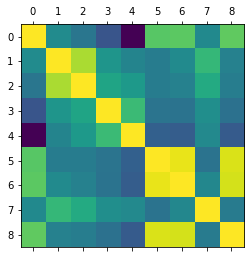

In [14]:
import matplotlib.pyplot as plt

plt.matshow(df_all.corr())
plt.show()

In [15]:
corr = df_all.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,temperature,precipitation,snowfall,snow_mass,air_density,radiation_surface,radiation_toa,cloud_cover,generation_kw
temperature,1,-8.3e-05,-0.17,-0.43,-0.94,0.5,0.51,-0.019,0.53
precipitation,-8.3e-05,1,0.75,0.078,-0.061,-0.12,-0.007,0.35,-0.082
snowfall,-0.17,0.75,1,0.2,0.1,-0.12,-0.085,0.25,-0.12
snow_mass,-0.43,0.078,0.2,1,0.38,-0.19,-0.2,0.022,-0.21
air_density,-0.94,-0.061,0.1,0.38,1,-0.34,-0.37,-0.024,-0.38
radiation_surface,0.5,-0.12,-0.12,-0.19,-0.34,1,0.93,-0.2,0.89
radiation_toa,0.51,-0.007,-0.085,-0.2,-0.37,0.93,1,-0.039,0.88
cloud_cover,-0.019,0.35,0.25,0.022,-0.024,-0.2,-0.039,1,-0.13
generation_kw,0.53,-0.082,-0.12,-0.21,-0.38,0.89,0.88,-0.13,1


In [16]:
X = df_all[['radiation_surface', 'temperature', 'air_density']]
X = X.loc[X.index.drop_duplicates()]
y = df_all['generation_kw']
print(X.shape)
print(y.shape)

(8759, 3)
(8759,)


In [17]:
X.head()

,radiation_surface,temperature,air_density
0,0.0,-2.542,1.106
1,0.0,-2.190,1.106
2,0.0,-2.182,1.106
3,0.0,-2.230,1.106
4,0.0,-2.113,1.105


In [18]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: generation_kw, dtype: float64

In [19]:
from sklearn.preprocessing import PolynomialFeatures

#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['radiation_surface','temperature','air_density',
                                                        'radiation_surface:temperature','radiation_surface:air_density',
                                                        'temperature:air_density'])

In [20]:
from statsmodels.regression import linear_model
interaction_model = linear_model.OLS(y, interaction_df).fit()

In [21]:
interaction_model.pvalues[interaction_model.pvalues < 0.05]

radiation_surface                 5.686036e-59
radiation_surface:temperature    2.246114e-113
radiation_surface:air_density     2.612531e-67
dtype: float64